## Solve an elliptic equation using the ADI algorithm
* Using ADI 2
$$\alpha\frac{\partial^2f}{\partial x^2} + \alpha\frac{\partial^2f}{\partial y^2} = S.$$
$$\frac{\alpha}{\Delta x^2}(f_{i-1,j}-2f_{i,j}+f_{i+1,j}) + \frac{\alpha}{\Delta y^2}(f_{i,j-1}-2f_{i,j}+f_{i,j+1}) = S_{i,j}$$

* couple x direction
<font color='blue'>
$$\left(\frac{\alpha}{\Delta x^2}\right)f_{i-1,j}+\alpha\left(-\frac{2}{\Delta x^2}-\frac{2}{\Delta y^2}\right)f_{i,j}+\left(\frac{\alpha}{\Delta x^2}\right)f_{i+1,j} = S_{i,j} - \left(\frac{\alpha}{\Delta y^2}\right)f_{i,j-1} - \left(\frac{\alpha}{\Delta y^2}\right)f_{i,j+1}$$
</font>

* couple y direction
<font color='green'>
$$\left(\frac{\alpha}{\Delta y^2}\right)f_{i,j-1}+\alpha\left(-\frac{2}{\Delta x^2}-\frac{2}{\Delta y^2}\right)f_{i,j}+\left(\frac{\alpha}{\Delta y^2}\right)f_{i,j+1} = S_{i,j} - \left(\frac{\alpha}{\Delta x^2}\right)f_{i-1,j} - \left(\frac{\alpha}{\Delta x^2}\right)f_{i+1,j}$$
</font>

In [28]:
using Plots
using ColorSchemes
using LinearAlgebra

In [39]:
nx = 42                # including boundaries
ny = 42                # including boundaries
Lx = 1.0
Ly = 1.0
dx = Lx/(nx-1)
dy = Ly/(ny-1)
α  = 1.0

S  = fill(-10.0, nx,ny)

maxit = 10000
tol   = 1.0E-4

#-----------------------------------------------------------------

function check_convergence()
    i = 2:nx-1
    j = 2:ny-1
    res = @. α*(f[i-1,j]-2.0*f[i,j]+f[i+1,j])/dx/dx +
             α*(f[i,j-1]-2.0*f[i,j]+f[i,j+1])/dy/dy -
             S[i,j]
    err = norm(res)
    ref = norm(S)
    if err/ref < tol
        println("number of iterations = $iter")
        return true
    else
        return false
    end
end
    
#-----------------------------------------------------------------
    
function plot_results()
    x = LinRange(0,Lx,nx)
    y = LinRange(0,Ly,ny)
    
    p=contourf(x,y,f, levels=20, lw=0)
    p=contourf!(xlabel="x", ylabel="y", aspect_ratio=1)
    p=contourf!(xlim=[0,1], ylim=[0,1])
    return p
end;

number of iterations = 385


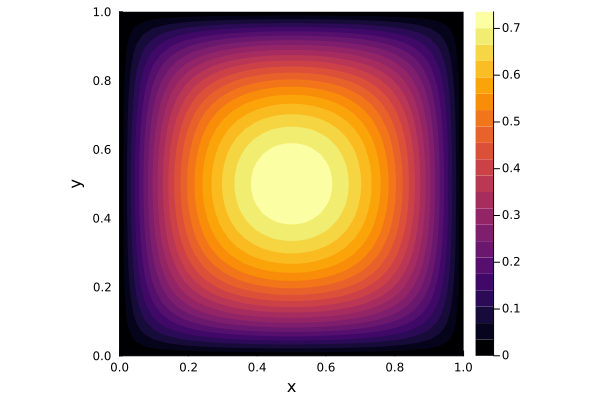

In [45]:
function thomas(l,aa,u,bb)
    
    a = copy(aa)        # a is modified, but we are reusing a, so make a copy
    b = copy(bb)        # b too
    
    n = length(a)
    x = zeros(n)
    for i in 2:n
        a[i] = a[i] - l[i]/a[i-1]*u[i-1]
        b[i] = b[i] - l[i]/a[i-1]*b[i-1]
    end
    
    x[n] = b[n]/a[n]
    for i in n-1:-1:1
        x[i] = (b[i]-u[i]*x[i+1])/a[i]
    end
    
    return x
end

#------------------------------------------------------

f  = zeros(nx,ny)
check_convergence()

ax = fill(α*(-2.0/dy/dy-2.0/dx/dx), nx-2)
ux = fill(α/dx/dx, nx-2)
lx = fill(α/dx/dx, nx-2)

ay = fill(α*(-2.0/dy/dy-2.0/dx/dx), ny-2)
uy = fill(α/dy/dy, ny-2)
ly = fill(α/dy/dy, ny-2)

iter = 0
for it in 1:maxit
    iter = it
    
    #------ sweep i lines  (soln in y dir)

    j = 2:ny-1
    for i in 2:nx-1
        by = @. S[i,j] - α/dx/dx*( f[i-1,j] + f[i+1,j] )
        f[i,j] = thomas(ly,ay,uy,by)
    end

    #------ sweep j lines  (soln in x dir)

    i = 2:nx-1
    for j in 2:ny-1
        bx = @. S[i,j] - α/dy/dy*( f[i,j-1] + f[i,j+1] )
        f[i,j] = thomas(lx,ax,ux,bx)
    end

    if check_convergence() break end
end

p=plot_results()
display(p)

## Jacobi method

number of iterations = 3055


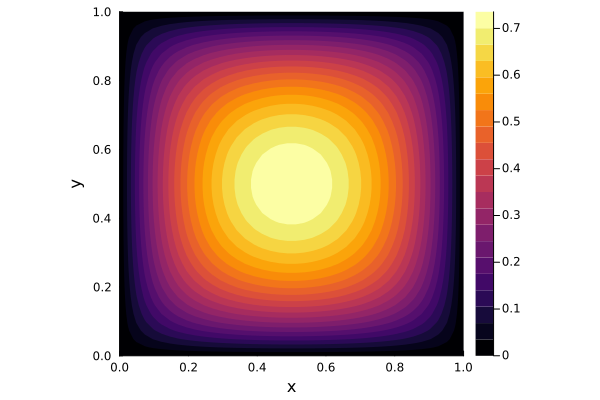

In [46]:
f = zeros(nx,ny)

i = 2:nx-1
j = 2:ny-1

iter = 0
for it in 1:maxit
    iter=it
    f[i,j] = @. (S[i,j] - 
                    α*(f[i-1,j]+f[i+1,j])/dx/dx -
                    α*(f[i,j-1]+f[i,j+1])/dy/dy) /
                    (-2*α/dx/dx - 2*α/dy/dy)
    
    if check_convergence() break end
end

p=plot_results()
display(p)